In [7]:
# import denendencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

# open the SST file data

In [2]:
SST_file = r'..\OpenData\SST\1993_2019_SST.nc'

# Open the file 
import xarray as xr
SST_ds = xr.open_dataset(SST_file,engine='netcdf4')



In [3]:
SST_ds

<xarray.Dataset>
Dimensions:    (time: 236663, longitude: 20, latitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01T01:00:00 ... 2019-12-31T23:00:00
  * longitude  (longitude) float32 0.5554 0.6665 0.7776 ... 2.444 2.555 2.666
  * latitude   (latitude) float32 51.2 51.27 51.33 51.4 ... 52.67 52.73 52.8
Data variables:
    thetao     (time, latitude, longitude) float64 ...
Attributes: (12/16)
    CDI:                  Climate Data Interface version 1.9.9rc1 (https://mp...
    Conventions:          CF-1.7
    history:              Thu Nov 24 20:51:09 2022: cdo -b F64 -f nc1 mergeti...
    source:               AMM-FOAM 7 km (tidal) NEMO v3.6_FABM-ERSEM v15.06_N...
    institution:          UK Met Office
    references:           http://marine.copernicus.eu/
    ...                   ...
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    forcing_data_source:  ECMWF; ERA5
    licence:              http://marine.copernicus.eu/services-portfolio/serv...
    title:                hourly-instantaneous surface temperature (2D)
    _CoordSysBuilder:     ucar.nc2.dataset.conv.CF1Convention
    CDO:                  Climate Data Operators version 1.9.9rc1 (https://mp...

In [8]:
# define a function to find the nearest index of the input coordinates
def find_nearest_index(longitude, latitude, ds):
    '''
    Find the nearest index of the input coordinates
    '''
    # find the nearest index of the input coordinates
    longitude_index = (np.abs(ds['longitude'] - longitude)).argmin().values
    latitude_index = (np.abs(ds['latitude'] - latitude)).argmin().values
    return longitude_index, latitude_index

    

In [5]:
SST_ds['latitude']

<xarray.DataArray 'latitude' (latitude: 25)>
array([51.20056, 51.26723, 51.3339 , 51.40057, 51.46724, 51.53391, 51.60058,
       51.66725, 51.73392, 51.80059, 51.86726, 51.93393, 52.0006 , 52.06727,
       52.13394, 52.20061, 52.26728, 52.33395, 52.40062, 52.46729, 52.53396,
       52.60063, 52.6673 , 52.73397, 52.80064], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 51.2 51.27 51.33 51.4 ... 52.6 52.67 52.73 52.8
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [6]:
cefas_location = [2.083,51.980]
longitude_index, latitude_index = find_nearest_index(cefas_location[0], cefas_location[1], SST_ds)
print(longitude_index, latitude_index)

14 12


In [7]:
SST = SST_ds['thetao'][:,latitude_index,longitude_index]
SST_time = SST_ds['time']
SST

<xarray.DataArray 'thetao' (time: 236663)>
[236663 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01T01:00:00 ... 2019-12-31T23:00:00
    longitude  float32 2.111
    latitude   float32 52.0
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      Sea Water Potential Temperature
    units:          degrees_C
    _ChunkSizes:    [  1 375 297]

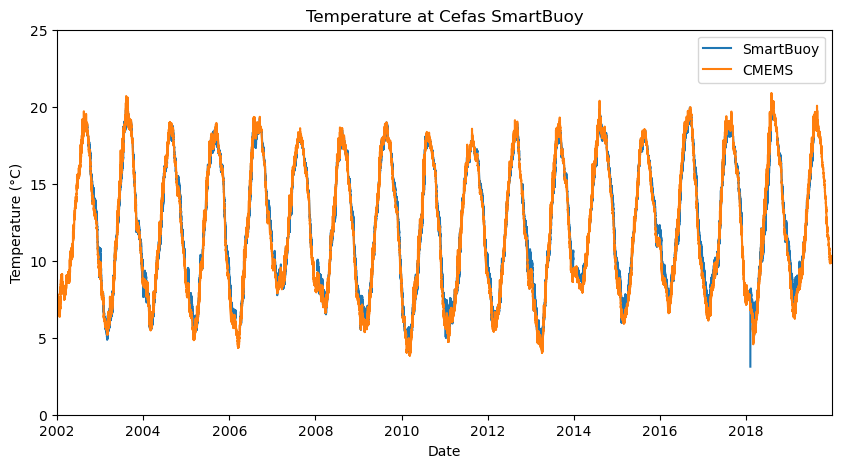

In [8]:

buoyfile = f'..\Cefas_smartbuoy\clean_data.csv'
WGAB = pd.read_csv(buoyfile, encoding='ANSI')
WGAB.head()
# WGAB.tail()
colours = WGAB['phase'].values
# WGAB['fluors'].plot(c = colours)

WGAB['phase']=WGAB['phase']+1 # shift phase by 1 to make it start at 1 for plotting

WGAB.index = pd.to_datetime(WGAB['dateTime'])
WGAB.drop(columns=['dateTime'], inplace=True)

SB_Temp = WGAB['temp']
# average SB_Temp to 1 hour with the same time as SST
SB_Temp_1h = SB_Temp.resample('1H').mean()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(SB_Temp_1h, label='SmartBuoy')
ax.plot(SST_time['time'], SST, label='CMEMS')
# set the x-axis limit from 2002 to 2019
ax.set_xlim([pd.to_datetime('2002-01-01'), pd.to_datetime('2019-12-31')])
ax.set_ylim([0,25])

ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Date')
ax.set_title('Temperature at Cefas SmartBuoy')
ax.legend(loc = 'upper right')
plt.show()

# WGAB.head()

In [9]:
WGAB

,temp,sal,ftu,fluors,o2,kd,par_0,par_1,par_2,phase
dateTime,,,,,,,,,,
2002-08-28 13:15:00,18.78,34.691,6.42,0.62,NaN,0.641,NaN,429.3,226.2,1
2002-08-28 13:30:00,18.77,34.666,6.56,0.63,NaN,0.688,NaN,475.9,239.1,1
2002-08-28 13:45:00,18.75,34.653,5.69,0.66,NaN,0.682,NaN,518.9,262.4,1
2002-08-28 14:00:00,18.75,34.635,5.50,0.69,NaN,0.720,NaN,603.9,294.0,1
2002-08-28 14:15:00,18.74,34.628,4.93,0.75,NaN,NaN,NaN,570.9,292.7,1
...,...,...,...,...,...,...,...,...,...,...
2019-12-07 13:30:00,NaN,NaN,NaN,NaN,NaN,0.452,NaN,NaN,NaN,5
2019-12-07 14:00:00,NaN,NaN,NaN,NaN,NaN,0.429,NaN,NaN,NaN,5
2019-12-07 14:30:00,NaN,NaN,NaN,NaN,NaN,0.422,NaN,NaN,NaN,5


# Plot the SSS data

In [10]:
SSS_file = r'..\OpenData\SSS\1993_2019_SSS.nc'

# Open the file using xarray
import xarray as xr
SSS_ds = xr.open_dataset(SSS_file,engine='netcdf4')
SSS_ds


<xarray.Dataset>
Dimensions:    (time: 236663, longitude: 20, latitude: 25)
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01T01:00:00 ... 2019-12-31T23:00:00
  * longitude  (longitude) float32 0.5554 0.6665 0.7776 ... 2.444 2.555 2.666
  * latitude   (latitude) float32 51.2 51.27 51.33 51.4 ... 52.67 52.73 52.8
Data variables:
    so         (time, latitude, longitude) float64 ...
Attributes: (12/16)
    CDI:                  Climate Data Interface version 1.9.9rc1 (https://mp...
    Conventions:          CF-1.7
    history:              Thu Nov 24 21:02:25 2022: cdo -b F64 -f nc1 mergeti...
    source:               AMM-FOAM 7 km (tidal) NEMO v3.6_FABM-ERSEM v15.06_N...
    institution:          UK Met Office
    references:           http://marine.copernicus.eu/
    ...                   ...
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    forcing_data_source:  ECMWF; ERA5
    licence:              http://marine.copernicus.eu/services-portfolio/serv...
    title:                hourly-instantaneous surface salinity (2D)
    _CoordSysBuilder:     ucar.nc2.dataset.conv.CF1Convention
    CDO:                  Climate Data Operators version 1.9.9rc1 (https://mp...

In [11]:
cefas_location = [2.083,51.980]
longitude_index, latitude_index = find_nearest_index(cefas_location[0], cefas_location[1], SSS_ds)
print(longitude_index, latitude_index)

14 12


In [12]:
SSS = SSS_ds['so'][:,latitude_index,longitude_index]
SSS_time = SSS_ds['time']
SSS

<xarray.DataArray 'so' (time: 236663)>
[236663 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01T01:00:00 ... 2019-12-31T23:00:00
    longitude  float32 2.111
    latitude   float32 52.0
Attributes:
    standard_name:  sea_water_salinity
    long_name:      Sea Water Salinity
    units:          1e-3
    _ChunkSizes:    [  1 375 297]

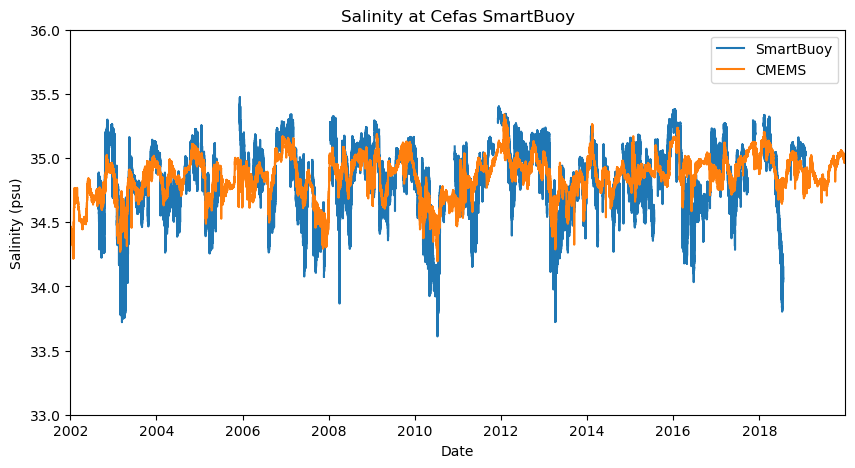

In [14]:

buoyfile = f'..\Cefas_smartbuoy\clean_data.csv'
WGAB = pd.read_csv(buoyfile, encoding='ANSI')
WGAB.head()
# WGAB.tail()
colours = WGAB['phase'].values
# WGAB['fluors'].plot(c = colours)

WGAB['phase']=WGAB['phase']+1 # shift phase by 1 to make it start at 1 for plotting

WGAB.index = pd.to_datetime(WGAB['dateTime'])
WGAB.drop(columns=['dateTime'], inplace=True)

SB_Sal = WGAB['sal']
# average SB_Temp to 1 hour with the same time as SST
# SB_Sal = SB_Sal.resample('1H').mean()


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(SB_Sal, label='SmartBuoy')
ax.plot(SSS_time['time'], SSS, label='CMEMS')
# set the x-axis limit from 2002 to 2019
ax.set_xlim([pd.to_datetime('2002-01-01'), pd.to_datetime('2019-12-31')])
ax.set_ylim([33,36])

ax.set_ylabel('Salinity (psu)')
ax.set_xlabel('Date')
ax.set_title('Salinity at Cefas SmartBuoy')
ax.legend(loc = 'upper right')
plt.show()




# WGAB.head()

In [15]:
SSS

<xarray.DataArray 'so' (time: 236663)>
array([35.248, 35.242, 35.234, ..., 35.029, 35.03 , 35.029])
Coordinates:
  * time       (time) datetime64[ns] 1993-01-01T01:00:00 ... 2019-12-31T23:00:00
    longitude  float32 2.111
    latitude   float32 52.0
Attributes:
    standard_name:  sea_water_salinity
    long_name:      Sea Water Salinity
    units:          1e-3
    _ChunkSizes:    [  1 375 297]

In [16]:
# build a dataframe for the SST and SSS
CMEMS_SST_SSS = pd.DataFrame({'CMEMS_SST':SST, 'CMEMS_SSS':SSS}, index = SST.time)
Buoy_SST_SSS = pd.DataFrame({'SB_Temp':SB_Temp, 'SB_Sal':SB_Sal}, index = SB_Sal.index)

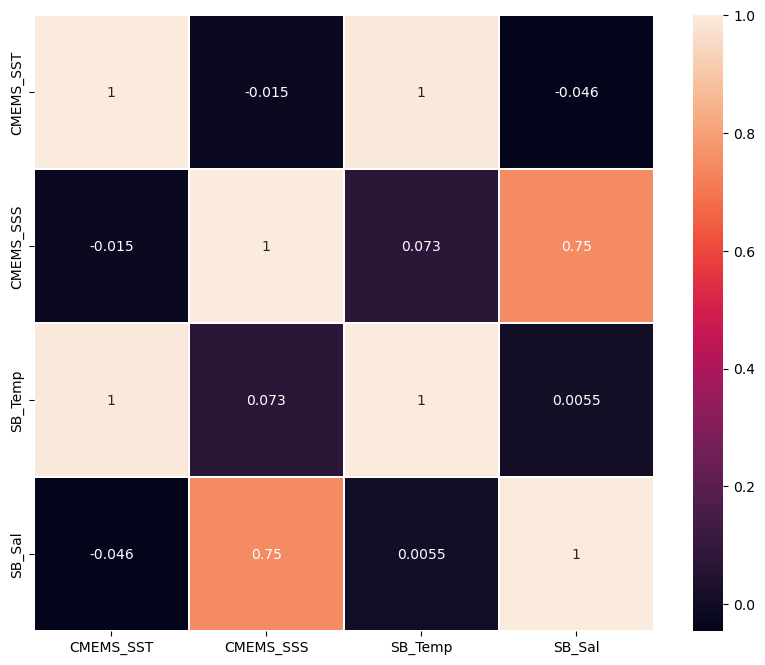

In [17]:
# resample Buoy_SST_SSS to 1 hour with the same time as SST
Buoy_SST_SSS_1h = Buoy_SST_SSS.resample('1H').mean()
Buoy_SST_SSS_1h

# calcualte the correlation matrix between CMEMS_SST_SSS and Buoy_SST_SSS_1h 
CMEMS_Buoy_Temp_Sal = pd.concat([CMEMS_SST_SSS, Buoy_SST_SSS_1h], axis=1)
CMEMS_Buoy_Temp_Sal.corr()
# plot the correlation matrix
import seaborn as sns
sns.heatmap(CMEMS_Buoy_Temp_Sal.corr(), annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()



In [18]:
CMEMS_Buoy_Temp_Sal = pd.concat([CMEMS_SST_SSS, Buoy_SST_SSS_1h], axis=1)
CMEMS_Buoy_Temp_Sal.corr()

,CMEMS_SST,CMEMS_SSS,SB_Temp,SB_Sal
CMEMS_SST,1.000000,-0.014637,0.995562,-0.045780
CMEMS_SSS,-0.014637,1.000000,0.073240,0.749094
SB_Temp,0.995562,0.073240,1.000000,0.005524
SB_Sal,-0.045780,0.749094,0.005524,1.000000


In [19]:
CMEMS_SST_SSS.to_csv('..\OpenData\CMEMS_SST_SSS.csv')

# Sea Surface Temperature

In [20]:
SST_file = r'..\OpenData\chlorophyll\cmems_mod_nws_bgc-chl_my_7km-3D_P1D-m_1669387001123.nc'

# Open the file using xarray
import xarray as xr
Chl_ds = xr.open_dataset(SST_file,engine='netcdf4')
Chl_ds


<xarray.Dataset>
Dimensions:    (depth: 2, time: 7305, latitude: 25, longitude: 20)
Coordinates:
  * depth      (depth) float32 0.0 3.0
  * latitude   (latitude) float32 51.2 51.27 51.33 51.4 ... 52.67 52.73 52.8
  * time       (time) datetime64[ns] 2002-01-01T12:00:00 ... 2021-12-31T12:00:00
  * longitude  (longitude) float32 0.5554 0.6665 0.7776 ... 2.444 2.555 2.666
Data variables:
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/15)
    title:                daily-mean chlorophyll concentration (3D)
    Conventions:          CF-1.7
    references:           http://marine.copernicus.eu/
    institution:          UK Met Office
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    ...                   ...
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    forcing_data_source:  ECMWF; ERA5
    licence:              http://marine.copernicus.eu/services-portfolio/serv...
    history:              See source and creation_date attributes
    _CoordSysBuilder:     ucar.nc2.dataset.conv.CF1Convention
    comment:

In [21]:
cefas_location = [2.083,51.980]
longitude_index, latitude_index = find_nearest_index(cefas_location[0], cefas_location[1], Chl_ds)
print(longitude_index, latitude_index)


14 12


In [22]:
CHL = Chl_ds['chl'][:,0,latitude_index,longitude_index]
CHL_time = Chl_ds['time']
CHL

<xarray.DataArray 'chl' (time: 7305)>
[7305 values with dtype=float32]
Coordinates:
    depth      float32 0.0
    latitude   float32 52.0
  * time       (time) datetime64[ns] 2002-01-01T12:00:00 ... 2021-12-31T12:00:00
    longitude  float32 2.111
Attributes:
    long_name:      Mass Concentration of chlorophyll in Sea Water
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    _ChunkSizes:    [  1  24 375 297]

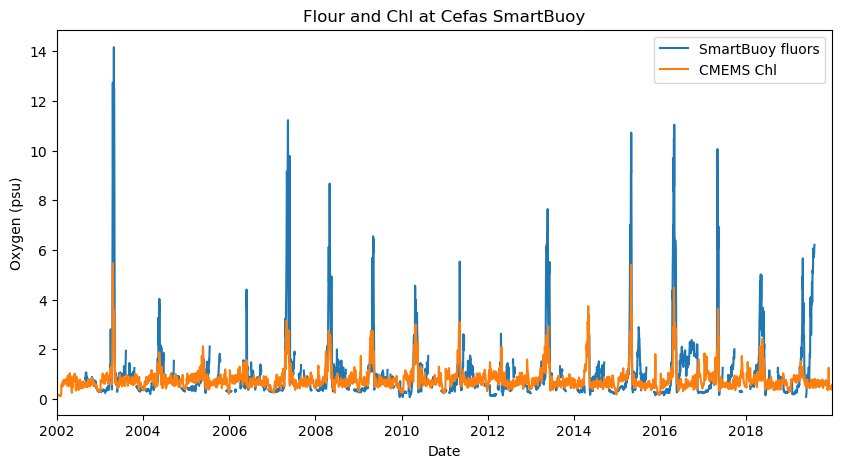

In [23]:

buoyfile = f'..\Cefas_smartbuoy\clean_data.csv'
WGAB = pd.read_csv(buoyfile, encoding='ANSI')
WGAB.head()
# WGAB.tail()
colours = WGAB['phase'].values
# WGAB['fluors'].plot(c = colours)

WGAB['phase']=WGAB['phase']+1 # shift phase by 1 to make it start at 1 for plotting

WGAB.index = pd.to_datetime(WGAB['dateTime'])
WGAB.drop(columns=['dateTime'], inplace=True)

SB_Sal = WGAB['fluors']
# average SB_Temp to 1 hour with the same time as SST
SB_Sal = SB_Sal.resample('24H').mean()


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(SB_Sal, label='SmartBuoy fluors')
ax.plot(CHL_time['time'], CHL, label='CMEMS Chl')
# set the x-axis limit from 2002 to 2019
ax.set_xlim([pd.to_datetime('2002-01-01'), pd.to_datetime('2019-12-31')])
# ax.set_ylim([33,36])

ax.set_ylabel('Oxygen (psu)')
ax.set_xlabel('Date')
ax.set_title('Flour and Chl at Cefas SmartBuoy')
ax.legend(loc = 'upper right')
plt.show()



In [24]:

Chl_df = pd.DataFrame({'Chl':CHL}, index = CHL_time['time'])
Buoy_Sal = pd.DataFrame({'SB_Sal':SB_Sal}, index = SB_Sal.index)

Buoy_Sal


,SB_Sal
dateTime,
2002-08-28,0.836744
2002-08-29,0.779063
2002-08-30,0.837500
2002-08-31,0.815312
2002-09-01,0.954167
...,...
2019-12-03,NaN
2019-12-04,NaN
2019-12-05,NaN


# Oxygen

In [25]:
DO_file = r'..\OpenData\DO\cmems_mod_nws_bgc-o2_my_7km-3D_P1D-m_1669387177186.nc'

# Open the file using xarray
import xarray as xr
DO_ds = xr.open_dataset(DO_file,engine='netcdf4')
DO_ds


<xarray.Dataset>
Dimensions:    (time: 7305, depth: 2, latitude: 25, longitude: 20)
Coordinates:
  * depth      (depth) float32 0.0 3.0
  * latitude   (latitude) float32 51.2 51.27 51.33 51.4 ... 52.67 52.73 52.8
  * time       (time) datetime64[ns] 2002-01-01T12:00:00 ... 2021-12-31T12:00:00
  * longitude  (longitude) float32 0.5554 0.6665 0.7776 ... 2.444 2.555 2.666
Data variables:
    o2         (time, depth, latitude, longitude) float32 ...
Attributes: (12/15)
    title:                daily-mean dissolved oxygen (3D)
    Conventions:          CF-1.7
    references:           http://marine.copernicus.eu/
    institution:          UK Met Office
    contact:              servicedesk.cmems@mercator-ocean.eu
    netcdf-version-id:    netCDF-4
    ...                   ...
    credit:               E.U. Copernicus Marine Service Information (CMEMS)
    forcing_data_source:  ECMWF; ERA5
    licence:              http://marine.copernicus.eu/services-portfolio/serv...
    history:              See source and creation_date attributes
    _CoordSysBuilder:     ucar.nc2.dataset.conv.CF1Convention
    comment:

In [26]:
DO = DO_ds['o2'][:,0,latitude_index,longitude_index]
DO_time = DO_ds['time']
DO

<xarray.DataArray 'o2' (time: 7305)>
[7305 values with dtype=float32]
Coordinates:
    depth      float32 0.0
    latitude   float32 52.0
  * time       (time) datetime64[ns] 2002-01-01T12:00:00 ... 2021-12-31T12:00:00
    longitude  float32 2.111
Attributes:
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    long_name:      Mole Concentration of Dissolved Oxygen in Sea Water
    units:          mmol m-3
    _ChunkSizes:    [  1  24 375 297]

NameError: name 'DO_time' is not defined

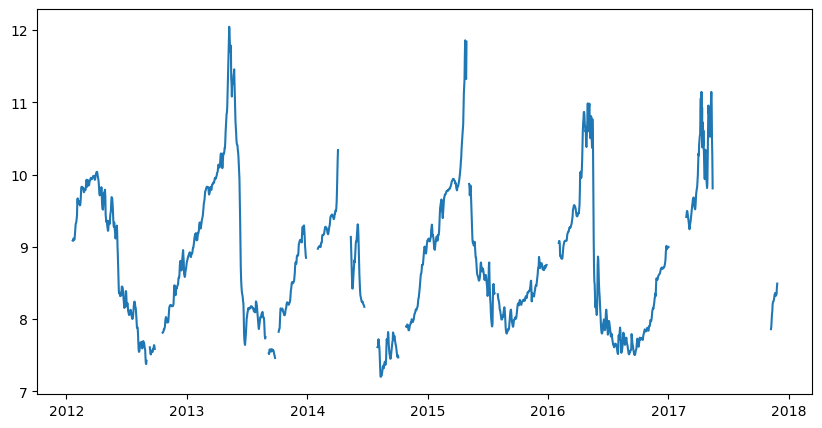

In [9]:

buoyfile = f'..\Cefas_smartbuoy\clean_data.csv'
WGAB = pd.read_csv(buoyfile, encoding='ANSI')
WGAB.head()
# WGAB.tail()
colours = WGAB['phase'].values
# WGAB['fluors'].plot(c = colours)

WGAB['phase']=WGAB['phase']+1 # shift phase by 1 to make it start at 1 for plotting

WGAB.index = pd.to_datetime(WGAB['dateTime'])
WGAB.drop(columns=['dateTime'], inplace=True)

SB_o2 = WGAB['o2']
# average SB_Temp to 1 hour with the same time as SST
SB_o2 = SB_o2.resample('24H').mean()


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(SB_o2, label='SmartBuoy')
ax.plot(DO_time['time'], DO/31.998, label='CMEMS')
# set the x-axis limit from 2002 to 2019
ax.set_xlim([pd.to_datetime('2002-01-01'), pd.to_datetime('2019-12-31')])
# ax.set_ylim([33,36])

ax.set_ylabel('Oxygen (psu)')
ax.set_xlabel('Date')
ax.set_title('Oxygen at Cefas SmartBuoy')
ax.legend(loc = 'upper right')
plt.show()




# WGAB.head()

In [28]:
CMEMS_Chl_O2 = pd.DataFrame({'CMEMS_Chl':CHL, 'CMEMS_O2':DO/31.998}, index = DO_time)
CMEMS_Chl_O2
CMEMS_Chl_O2.to_csv('..\OpenData\CMEMS_Chl_O2.csv')

# Solar radiation

In [10]:
SST_file = r'..\OpenData\Solar\2002_2019_Solar.nc'

# Open the file 
import xarray as xr
Solar_ds = xr.open_dataset(SST_file,engine='netcdf4')



In [11]:
Solar_ds

'surface_net_solar_radiation', 'surface_solar_radiation_downwards'

('surface_net_solar_radiation', 'surface_solar_radiation_downwards')

In [12]:
# define a function to find the nearest index of the input coordinates
def find_nearest_index(longitude, latitude, ds):
    '''
    Find the nearest index of the input coordinates
    '''
    # find the nearest index of the input coordinates
    longitude_index = (np.abs(ds['lon'] - longitude)).argmin().values
    latitude_index = (np.abs(ds['lat'] - latitude)).argmin().values
    return longitude_index, latitude_index

    

In [13]:
Solar_ds['lat']

<xarray.DataArray 'lat' (lat: 7)>
array([52.69, 52.44, 52.19, 51.94, 51.69, 51.44, 51.19])
Coordinates:
  * lat      (lat) float64 52.69 52.44 52.19 51.94 51.69 51.44 51.19
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [17]:
cefas_location = [2.083,51.980]
longitude_index, latitude_index = find_nearest_index(cefas_location[0], cefas_location[1], Solar_ds)
print(longitude_index, latitude_index)

6 3


In [20]:
SSR = Solar_ds['ssr'][:,latitude_index,longitude_index]
SSRD   = Solar_ds['ssrd'][:,latitude_index,longitude_index]
SSR_time = Solar_ds['time']
SSR

<xarray.DataArray 'ssr' (time: 166560)>
[166560 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2002-01-01 ... 2020-12-31T23:00:00
    lon      float64 2.04
    lat      float64 51.94
Attributes:
    standard_name:  surface_net_downward_shortwave_flux
    long_name:      Surface net solar radiation
    units:          J m**-2
    code:           176
    table:          128
    institution:    ECMWF

In [26]:
SSRD

<xarray.DataArray 'ssrd' (time: 166560)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 2002-01-01 ... 2020-12-31T23:00:00
    lon      float64 2.04
    lat      float64 51.94
Attributes:
    standard_name:  surface_downwelling_shortwave_flux_in_air
    long_name:      Surface solar radiation downwards
    units:          J m**-2
    code:           169
    table:          128
    institution:    ECMWF

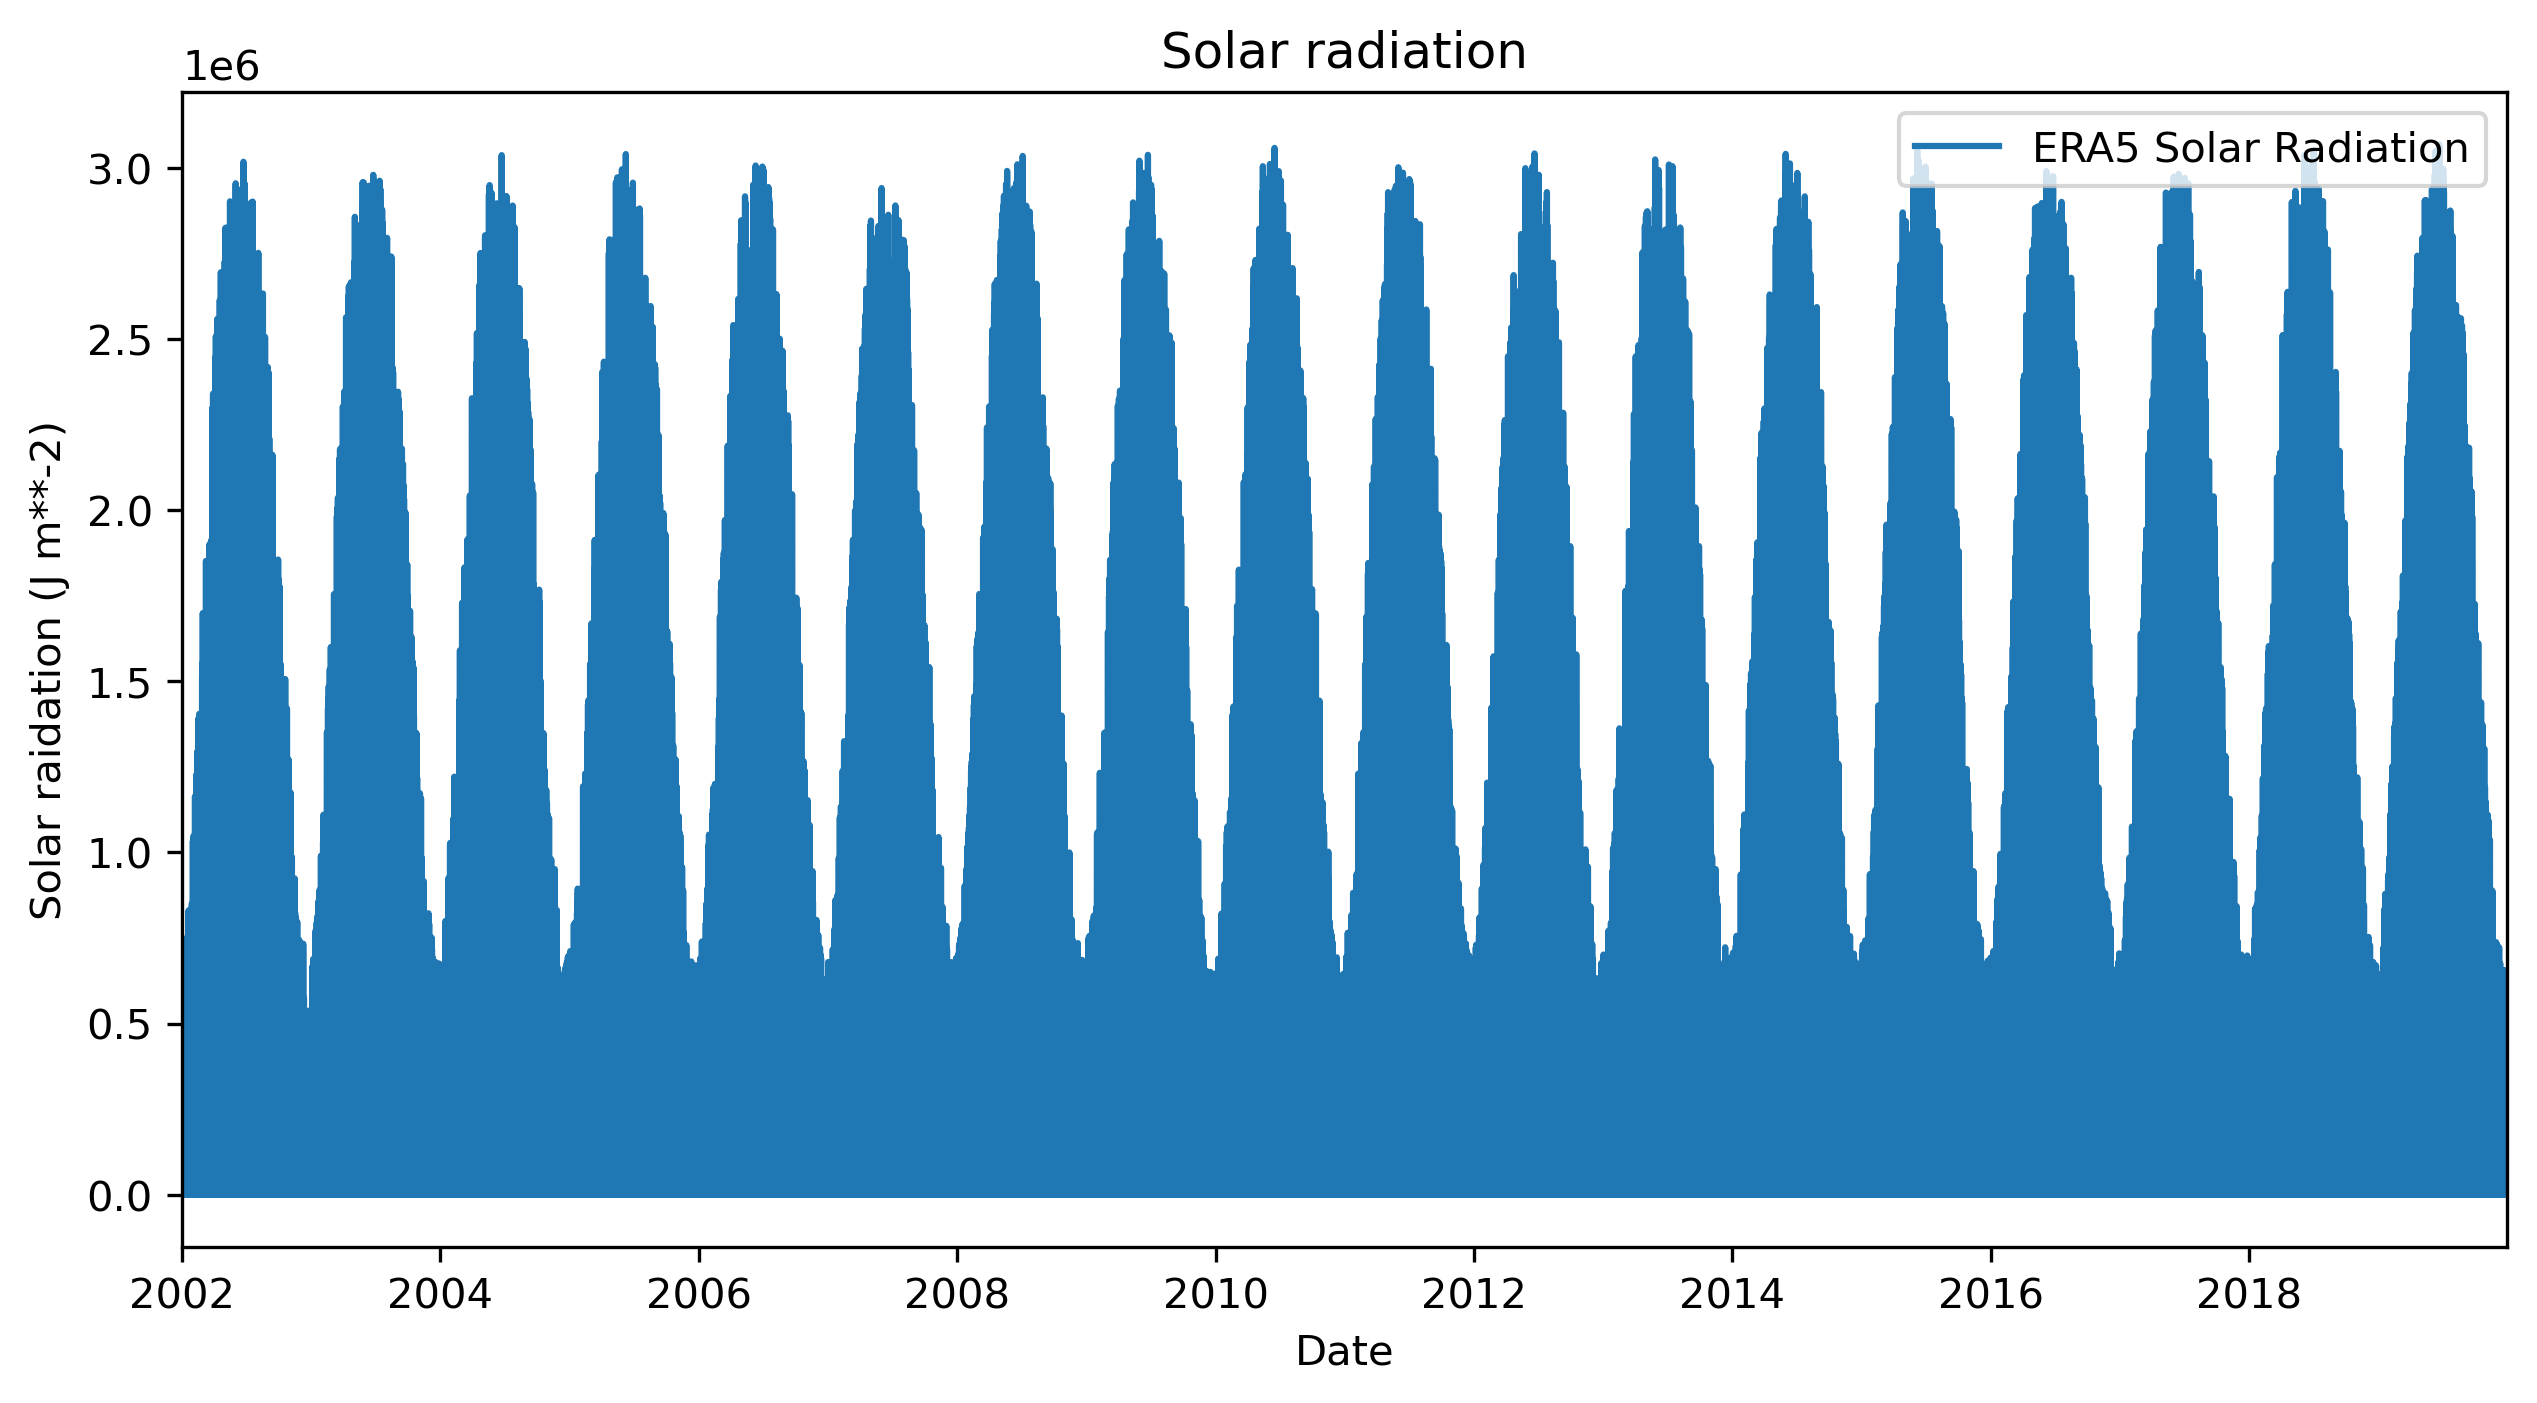

In [27]:

buoyfile = f'..\Cefas_smartbuoy\clean_data.csv'
WGAB = pd.read_csv(buoyfile, encoding='ANSI')
WGAB.head()
# WGAB.tail()
colours = WGAB['phase'].values
# WGAB['fluors'].plot(c = colours)

WGAB['phase']=WGAB['phase']+1 # shift phase by 1 to make it start at 1 for plotting

WGAB.index = pd.to_datetime(WGAB['dateTime'])
WGAB.drop(columns=['dateTime'], inplace=True)

SB_Par = WGAB['par_1']
# average SB_Temp to 1 hour with the same time as SST
SB_Par_1h = SB_Par.resample('1H').mean()

fig, ax = plt.subplots(figsize=(10, 5),dpi=300)
ax.plot(SSR_time['time'], SSR, label='ERA5 Solar Radiation')
# ax.plot(SB_Par_1h, label='SmartBuoy')

# set the x-axis limit from 2002 to 2019
ax.set_xlim([pd.to_datetime('2002-01-01'), pd.to_datetime('2019-12-31')])
# ax.set_ylim([0,25])

ax.set_ylabel('Solar raidation (J m**-2)')
ax.set_xlabel('Date')
ax.set_title('Solar radiation')
ax.legend(loc = 'upper right')
plt.show()

# WGAB.head()

<AxesSubplot:>

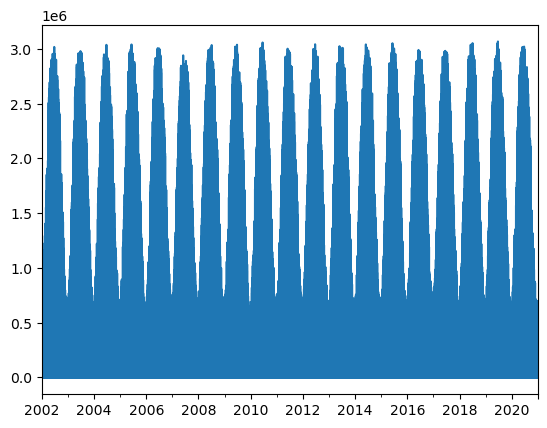

In [34]:
# build a dataframe for the SST and SSS
CMEMS_SST_SSS = pd.DataFrame({'SSR':SSR, 'SSRD':SSRD}, index = SSR_time)
CMEMS_SST_SSS['SSR'].plot()


In [35]:
CMEMS_SST_SSS.to_csv('..\OpenData\ERA5_Solar.csv')

# Nitrate (Abandon)


In [ ]:
NO3_file = r'..\OpenData\NO3\cmems_mod_nws_bgc-no3_my_7km-3D_P1D-m_1669386271678.nc'

# Open the file using xarray
import xarray as xr
NO3_ds = xr.open_dataset(NO3_file,engine='netcdf4')
NO3_ds


In [ ]:
cefas_location = [2.083,51.980]
longitude_index, latitude_index = find_nearest_index(cefas_location[0], cefas_location[1], Chl_ds)
print(longitude_index, latitude_index)


In [ ]:
NO3 = NO3_ds['no3'][:,0,latitude_index,longitude_index]
NO3_time = NO3_ds['time']
NO3.plot()

In [ ]:

buoyfile = f'..\Cefas_smartbuoy\clean_data.csv'
WGAB = pd.read_csv(buoyfile, encoding='ANSI')
WGAB.head()
# WGAB.tail()
colours = WGAB['phase'].values
# WGAB['fluors'].plot(c = colours)

WGAB['phase']=WGAB['phase']+1 # shift phase by 1 to make it start at 1 for plotting

WGAB.index = pd.to_datetime(WGAB['dateTime'])
WGAB.drop(columns=['dateTime'], inplace=True)

SB_Sal = WGAB['fluors']
# average SB_Temp to 1 hour with the same time as SST
SB_Sal = SB_Sal.resample('24H').mean()


fig, ax = plt.subplots(figsize=(10, 5))
# ax.plot(SB_Sal, label='SmartBuoy fluors')
ax.plot( NO3, label='CMEMS NO3')
# set the x-axis limit from 2002 to 2019
ax.set_xlim([pd.to_datetime('2002-01-01'), pd.to_datetime('2019-12-31')])
# ax.set_ylim([33,36])

ax.set_ylabel('NO3 (mmol/L)')
ax.set_xlabel('Date')
ax.set_title('NO3 from CMEMS')
ax.legend(loc = 'upper right')
plt.show()




# WGAB.head()